#Training Metrics

C:\Users\hvard\anaconda3\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\hvard\anaconda3\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\hvard\anaconda3\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


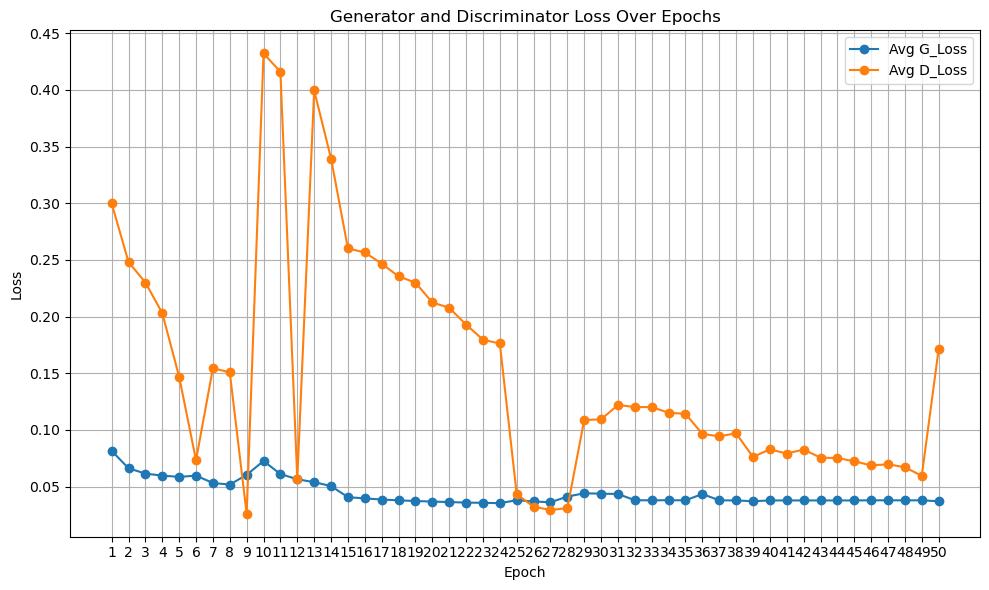

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load only the first 3 columns with proper encoding
df = pd.read_csv(r"C:\Users\hvard\Desktop\CVIP_Project\Epoch_summary_final.csv", encoding='latin1', usecols=[0, 1, 2])
df = df.dropna(subset=df.columns[:3])  # Drop rows with missing values
df.columns = ['Epoch', 'Avg G_Loss', 'Avg D_Loss']  # Rename columns

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Epoch'], df['Avg G_Loss'], label='Avg G_Loss', marker='o')
plt.plot(df['Epoch'], df['Avg D_Loss'], label='Avg D_Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Generator and Discriminator Loss Over Epochs')
plt.xticks(df['Epoch'])  # Show all epoch numbers on x-axis
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


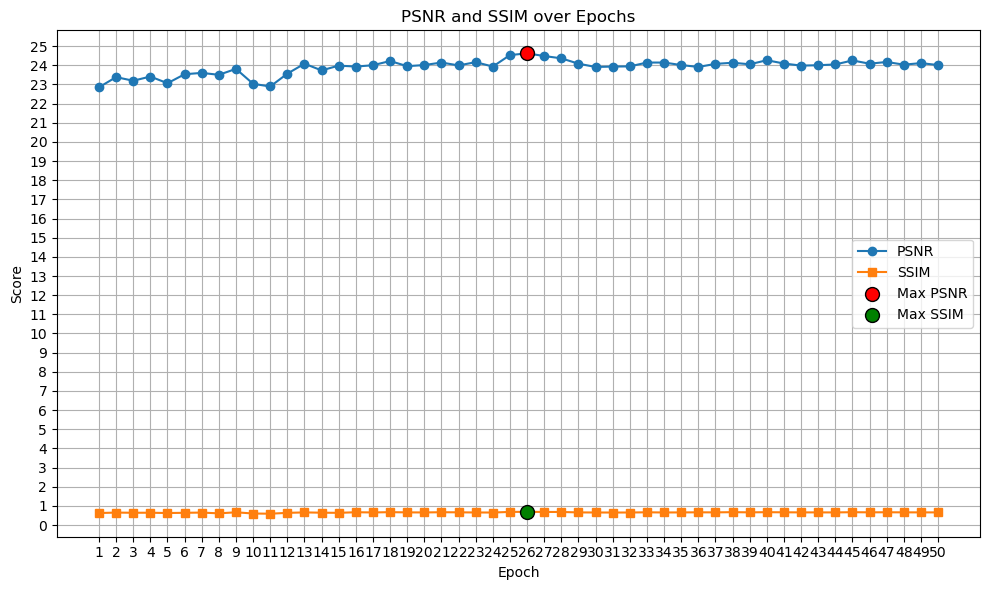

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Path to your CSV file
file_path =r"C:\Users\hvard\Desktop\CVIP_Project\Epoch_summary_final.csv"

# Load columns 1 (Epoch), 4 (PSNR), and 5 (SSIM)
df = pd.read_csv(file_path, encoding='latin1', usecols=[0, 3, 4])
df.columns = ['Epoch', 'PSNR', 'SSIM']
df = df.dropna(subset=['Epoch', 'PSNR', 'SSIM'])

# Ensure Epoch is int
df['Epoch'] = df['Epoch'].astype(int)

# Find max PSNR and SSIM
max_psnr_idx = df['PSNR'].idxmax()
max_ssim_idx = df['SSIM'].idxmax()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Epoch'], df['PSNR'], label='PSNR', marker='o')
plt.plot(df['Epoch'], df['SSIM'], label='SSIM', marker='s')

# Highlight max PSNR
plt.scatter(df.loc[max_psnr_idx, 'Epoch'], df.loc[max_psnr_idx, 'PSNR'],
            color='red', s=100, label='Max PSNR', edgecolors='black', zorder=5)

# Highlight max SSIM
plt.scatter(df.loc[max_ssim_idx, 'Epoch'], df.loc[max_ssim_idx, 'SSIM'],
            color='green', s=100, label='Max SSIM', edgecolors='black', zorder=5)

# Set integer ticks on x-axis
plt.xticks(np.arange(df['Epoch'].min(), df['Epoch'].max() + 1, 1))

# Set integer ticks on y-axis based on overall min and max (ceil/floor for safety)
y_min = int(np.floor(min(df['PSNR'].min(), df['SSIM'].min())))
y_max = int(np.ceil(max(df['PSNR'].max(), df['SSIM'].max())))
plt.yticks(np.arange(y_min, y_max + 1, 1))

# Labels and formatting
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('PSNR and SSIM over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
